<a href="https://colab.research.google.com/github/Tanyeliiremguven/DSA210-Project/blob/main/DSA210_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exclude data before 2023 from daily step data to have a better approximation

In [ ]:
import pandas as pd

# Load the daily steps data (ensure the file path is correct)
steps_file_path = '/content/daily_steps.csv'
steps_data = pd.read_csv(steps_file_path, delimiter=';')

# Exclude data from before 2023
steps_data['Date'] = pd.to_datetime(steps_data['Date'], errors='coerce')  # Convert Date column to datetime format
steps_data_filtered = steps_data[steps_data['Date'].dt.year >= 2023]  # Filter for data from 2023 onwards

# Save the filtered data to a new CSV file
filtered_steps_file_path = '/content/daily_steps.csv'
steps_data_filtered.to_csv(filtered_steps_file_path, index=False)

print(f"Filtered data saved to: {filtered_steps_file_path}")



Filtered data saved to: /content/daily_steps.csv


Getting data before, after and on exam days.

In [ ]:
import pandas as pd

# Reload the daily steps data with proper delimiter handling
steps_file_path = '/content/daily_steps.csv'
steps_data_filtered = pd.read_csv(steps_file_path, delimiter=',')  # Using ',' as the correct delimiter

# Inspect the columns
print("Columns in steps_data_filtered:", steps_data_filtered.columns)

# Normalize column names
steps_data_filtered.columns = steps_data_filtered.columns.str.strip().str.lower()

# Ensure 'date' column exists and split the 'date,steps' if still combined
if 'date,steps' in steps_data_filtered.columns:
    steps_data_filtered = steps_data_filtered['date,steps'].str.split(',', expand=True)
    steps_data_filtered.columns = ['date', 'steps']

# Convert 'date' column to datetime
steps_data_filtered['date'] = pd.to_datetime(steps_data_filtered['date'], errors='coerce')

# Define the date intervals
intervals = [
    ('2024-05-27', '2024-06-11'),  # First interval
    ('2024-10-25', '2024-11-14')  # Second interval
]

# Create a mask to filter rows within the intervals
mask = False
for start_date, end_date in intervals:
    mask |= (steps_data_filtered['date'] >= pd.to_datetime(start_date)) & (steps_data_filtered['date'] <= pd.to_datetime(end_date))

# Filter the data based on the mask
steps_in_intervals = steps_data_filtered[mask]

# Save the filtered data to a new CSV file
intervals_file_path = '/content/steps_in_intervals.csv'
steps_in_intervals.to_csv(intervals_file_path, index=False)

print(f"Filtered data for specified intervals saved to: {intervals_file_path}")


Columns in steps_data_filtered: Index(['Date', 'Steps'], dtype='object')
Filtered data for specified intervals saved to: /content/steps_in_intervals.csv


In [ ]:
# Create a mask to exclude rows within the specified intervals
exclude_mask = True  # Start with True to exclude the rows within the intervals
for start_date, end_date in intervals:
    exclude_mask &= ~((steps_data_filtered['date'] >= pd.to_datetime(start_date)) &
                      (steps_data_filtered['date'] <= pd.to_datetime(end_date)))

# Filter the data based on the exclusion mask
steps_excluding_intervals = steps_data_filtered[exclude_mask]

# Save the filtered data (excluding intervals) to a new CSV file
excluded_intervals_file_path = '/content/steps_excluding_intervals.csv'
steps_excluding_intervals.to_csv(excluded_intervals_file_path, index=False)

excluded_intervals_file_path


'/content/steps_excluding_intervals.csv'

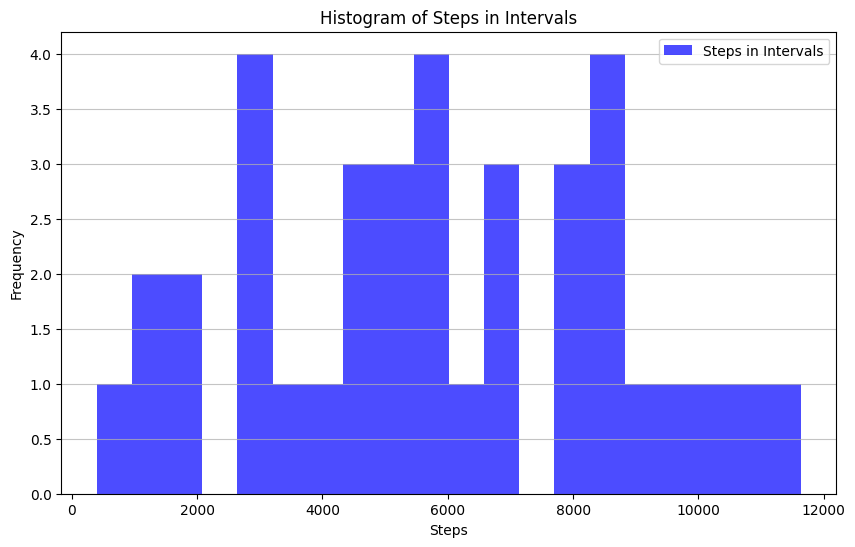

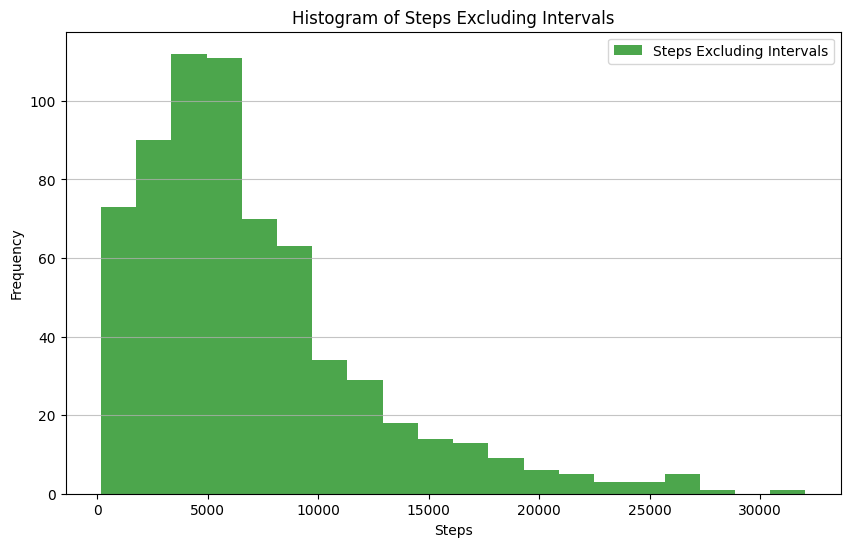

<ipython-input-23-3a176432ee7c>:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


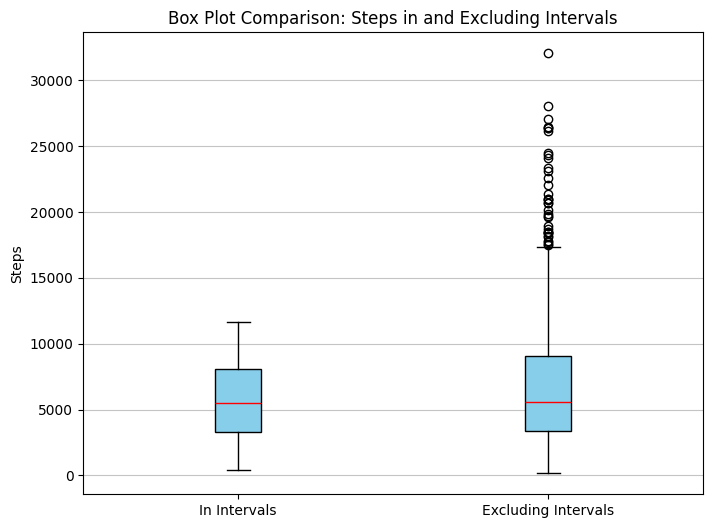

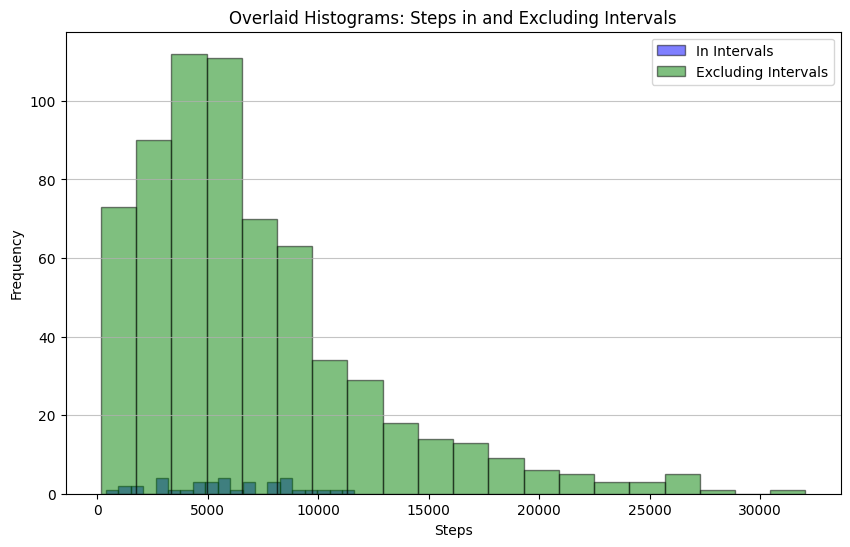

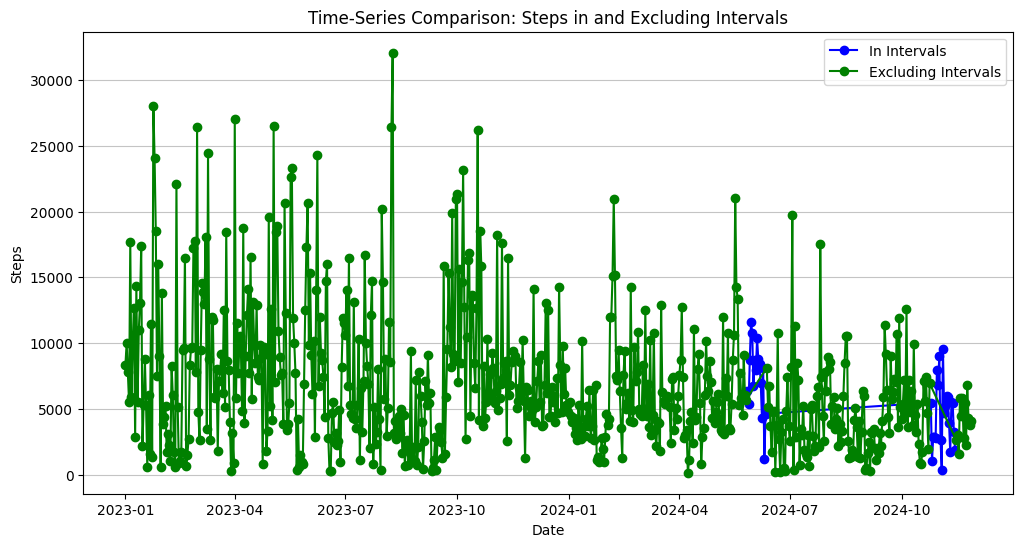

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Ensure the 'steps' column is numeric for plotting
steps_in_intervals['steps'] = pd.to_numeric(steps_in_intervals['steps'], errors='coerce')
steps_excluding_intervals['steps'] = pd.to_numeric(steps_excluding_intervals['steps'], errors='coerce')

# Drop rows with NaN values in 'steps'
steps_in_intervals = steps_in_intervals.dropna(subset=['steps'])
steps_excluding_intervals = steps_excluding_intervals.dropna(subset=['steps'])

# Plot: Histogram for Steps in Intervals
plt.figure(figsize=(10, 6))
plt.hist(steps_in_intervals['steps'], bins=20, alpha=0.7, label='Steps in Intervals', color='blue')
plt.title('Histogram of Steps in Intervals')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot: Histogram for Steps Excluding Intervals
plt.figure(figsize=(10, 6))
plt.hist(steps_excluding_intervals['steps'], bins=20, alpha=0.7, label='Steps Excluding Intervals', color='green')
plt.title('Histogram of Steps Excluding Intervals')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot: Box Plot for Comparison
plt.figure(figsize=(8, 6))
plt.boxplot(
    [steps_in_intervals['steps'], steps_excluding_intervals['steps']],
    labels=['In Intervals', 'Excluding Intervals'],
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='black'),
    medianprops=dict(color='red')
)
plt.title('Box Plot Comparison: Steps in and Excluding Intervals')
plt.ylabel('Steps')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot: Overlaid Histograms for Comparison
plt.figure(figsize=(10, 6))
plt.hist(steps_in_intervals['steps'], bins=20, alpha=0.5, label='In Intervals', color='blue', edgecolor='black')
plt.hist(steps_excluding_intervals['steps'], bins=20, alpha=0.5, label='Excluding Intervals', color='green', edgecolor='black')
plt.title('Overlaid Histograms: Steps in and Excluding Intervals')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot: Time-Series Comparison (Optional, if dates are needed)
plt.figure(figsize=(12, 6))
plt.plot(steps_in_intervals['date'], steps_in_intervals['steps'], label='In Intervals', marker='o', linestyle='-', color='blue')
plt.plot(steps_excluding_intervals['date'], steps_excluding_intervals['steps'], label='Excluding Intervals', marker='o', linestyle='-', color='green')
plt.title('Time-Series Comparison: Steps in and Excluding Intervals')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
# Calculate the means for both datasets
mean_in_intervals = steps_in_intervals['steps'].mean()
mean_excluding_intervals = steps_excluding_intervals['steps'].mean()

# Perform linear regression for steps in intervals
in_intervals_slope, in_intervals_intercept, _, _, _ = linregress(
    steps_in_intervals.index, steps_in_intervals['steps']
)

# Perform linear regression for steps excluding intervals
excluding_intervals_slope, excluding_intervals_intercept, _, _, _ = linregress(
    steps_excluding_intervals.index, steps_excluding_intervals['steps']
)

# Regression equations
regression_in_intervals = f"y1 = {in_intervals_slope:.2f}x + {in_intervals_intercept:.2f}"
regression_excluding_intervals = f"y2 = {excluding_intervals_slope:.2f}x + {excluding_intervals_intercept:.2f}"

mean_in_intervals, mean_excluding_intervals, regression_in_intervals, regression_excluding_intervals


(5789.7027027027025,
 6937.019696969697,
 'y1 = -19.24x + 17463.90',
 'y2 = -7.49x + 9433.53')